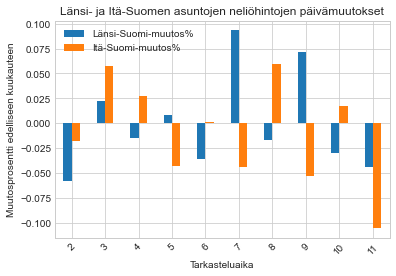

In [62]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

hinnat = pd.read_excel('http://myy.haaga-helia.fi/~bgv290/Dataa/asuntojen_hinnat.xlsx', sheet_name='Hinnat')
hinnat.columns = ['Ajankohta', 'Länsi-Suomi', 'Itä-Suomi']
hinnat['Ajankohta'] = hinnat['Ajankohta'].astype(str).str.strip('*')
hinnat['Ajankohta'] = pd.to_datetime(hinnat['Ajankohta'], format='%YM%m') + MonthEnd(0)
#hinnat.groupby(hinnat['Ajankohta'].dt.year)['Länsi-Suomi'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')
#hinnat.groupby(hinnat['Ajankohta'].dt.year)['Itä-Suomi'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')
#.groupby(hinnat['Ajankohta'].dt.month)['Länsi-Suomi'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f}')
#.groupby(hinnat['Ajankohta'].dt.month)['Itä-Suomi'].describe(percentiles = [.1,.25,.75,.9]).style.format('{:.2f
hinnat['Länsi-Suomen indeksi'] = hinnat['Länsi-Suomi'] / hinnat['Länsi-Suomi'].iloc[0] * 100
hinnat['Itä-Suomen indeksi'] = hinnat['Itä-Suomi'] / hinnat['Itä-Suomi'].iloc[0] * 100
#hinnat.head()
#hinnat.tail()
hinnat['Länsi-Suomi-muutos%'] = hinnat['Länsi-Suomi'].pct_change()
hinnat['Itä-Suomi-muutos%'] = hinnat['Itä-Suomi'].pct_change()
hinnat.style.format({'Länsi-Suomi-muutos%': '{:.2f} %'})
hinnat.style.format({'Itä-Suomi-muutos%': '{:.2f} %'})
muutokset = pd.concat([hinnat['Länsi-Suomi-muutos%'],hinnat['Itä-Suomi-muutos%']], axis = 1)
#muutokset.head(10)
#muutokset.tail(10
#['Länsi-Suomi'].plot()
#hinnat['Itä-Suomi'].plot()
#fig1, ax1 = plt.subplots(figsize=(10,6))
#color = 'C0'
#ax1.set(ylabel = 'Neliöhinta', xlabel = 'Kuukausi', title = 'Länsi-Suomen asuntojen hinnat')
#ax1.plot(hinnat['Länsi-Suomi'], color=color)
#ax1.plot(hinnat['Itä-Suomi'], color=color)

#ax2 = ax1.twinx()

#color = 'C1'
#ax2.set_ylabel('Itä-Suomen asuntojen hinnat', color=color)
#ax2.plot(hinnat['Itä-Suomi'], color=color)
#ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

#fig1, ax1 = plt.subplots(figsize=(10,6))
#color = 'C0'
#ax1.set(ylabel = 'Länsi-Suomen neliöhinta', xlabel = 'Päivämäärä', title = 'Länsi- ja Itä-Suomen asuntojen hinnat')
#ax1.plot(hinnat['Länsi-Suomi'], color=color)

#ax2 = ax1.twinx()
#color = 'C1'
#ax2.set_ylabel('Itä-Suomen neliöhinta', color=color)
#ax2.plot(hinnat['Itä-Suomi'], color=color)
#ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

#fig_index, ax_index = plt.subplots(figsize=(10,6))
#ax_index.set(ylabel = 'Indeksin pisteluku', xlabel = 'Päivämäärä', title = 'Asuntojen hintojen muutokset')
#ax_index.plot(hinnat['Länsi-Suomen indeksi'], color='blue', label = 'Länsi-Suomi')
#ax_index.plot(hinnat['Itä-Suomen indeksi'], color='green', label ='Itä-Suomi', linestyle='dashed')

ax_pera = muutokset[-10:].plot.bar(rot=45)
ax_pera.set_ylabel('Muutosprosentti edelliseen kuukauteen')
ax_pera.set_title('Länsi- ja Itä-Suomen asuntojen neliöhintojen päivämuutokset')
ax_pera.set_xlabel('Tarkasteluaika')

hinnat.to_excel("muutoksen_kuvailu.xlsx", sheet_name='hinnat')